# <font color = violet>Lead Scoring Case Study</font>
######  <font color = green> By --> Raoof & Sai Priya </font>

### 1. Data Reading and Understanding

#### 1.1 Importing libraries

In [1]:
# Supressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all relevant libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Making sure that we see all rows and columns, since in newer editions python does not show all data by default

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# Resetting the seaborn style 

sns.reset_orig()

#### 1.2 Reading the data and checking its metrics 

In [5]:
# Loading and reading the top 5 rows of dataset

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Checking the shape of dataset

lead_df.shape

(9240, 37)

In [7]:
# Checking the columns of dataset

lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Checking the columns-wise summary of dataset

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see from above that `there are null values` present, so we will deal with them, apart from that all columns preliminary seem to have correct data types associated with them.

In [9]:
# Checking the statical summary of all numeric columns
         
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From the summary above it can be noted that all the values are within `acceptable region` and thus `passes the sanity check`

In [10]:
# Checking for duplicate rows in our dataset

sum(lead_df.duplicated())

0

In [11]:
# Checking for duplicate Prospect ID in our dataset

sum(lead_df['Prospect ID'].duplicated())

0

In [12]:
# Checking for duplicate Lead Number in our dataset

sum(lead_df['Lead Number'].duplicated())

0

There are no duplicate values present in our dataset

In [13]:
# Dropping the columns Prospect ID and Lead Number, since they do not hold any relevant information and act only as an index

lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [14]:
# Checking the number of columns after modifications

lead_df.shape

(9240, 35)

In [15]:
# Checking the modified dataset

lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Data Cleaning and Analysis 

#### 2.1 Dealing with Missing data   A.K.A   Null values for categorical columns whilst performing univariate analysis

##### 2.1.1 Removing the columns with more than 40% missing values

In our dataset it can be noticed that there are values as `select`, these values signify that the user has not selected any option, that is the significance of this value is nothing different from null values or missing data hence we will replace all values with `select` as null values.

In [16]:
# Replacing `select` values with null values

lead_df = lead_df.replace('Select', np.NaN)

In [17]:
# Checking percentage of Null values present in each column

(((lead_df.isnull().sum())*100)/lead_df.shape[0]).sort_values(ascending = False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

As we can see above that there are numerous columns with a `larger percentage of null values`, these columns do not contain enough information to draw insights, and in doing so, there is a chance that we may harm our analysis by providing inadequate knowledge pertaining to the significant amount of missing data, so it is better to `drop them`.

In [18]:
def rem40(x):                                           # Defining our custom function for handling missing values
    for i in x.columns:                                 # Iterating over each column name in our dataset 
        if ((x[i].isnull().sum()/x.shape[0])*100) > 40: # Checking whether the percentage of those null values is greater than 40 
            x.drop(i,axis = 1,inplace = True)           # If yes, we would drop the column else will repeat check for the next one 

In [19]:
rem40(lead_df) # Applying our custom defined function on the dataset

In [20]:
lead_df.shape # As we can see our function has removed 7 columns that contained > 40% null values

(9240, 28)

In [21]:
# Here we can see that our function has worked successfully

((lead_df.isnull().sum()/lead_df.shape[0])*100).sort_values(ascending = False )

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Last Notable Activity                             0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Search                                            0.000000
A free copy of Mastering The Interview            0.0000

So, as for columns with missing values `less than 30%`, an ideal scenario would be to `impute` them by `mode in case of categorical` columns and `median` (or any other relevant aspect of central tendency) for `numerical` columns although we would be using median as it is relatively less affected by outliers.

We will be performing the cleaning part and analyzing in this order only

##### 2.1.2 Imputing the columns with less than 40% missing values and performing univariate analysis simultaneously.

In [22]:
# Encoding the dataset with Yes as 1, and No as 0

lead_df = lead_df.replace('Yes' , 1)
lead_df = lead_df.replace('No' , 0)##### 2.1.1 Removing the columns with more than 40% missing values

In [23]:
# Defining a custom function to display value count for the selected feature, since this task would be repeated numerous time

def count(x):                    
    return(lead_df[x].value_counts(dropna  = False))

In [24]:
# Using our custom function on City column

count('City')

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [25]:
lead_df['City'] = lead_df['City'].replace(np.NaN,'Mumbai') # Replacing all Null values with mode

In [26]:
count('City')  # Ascertaining the changes made using our custom function

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

We can notice that `Mumbai` has highest number of potential leads, while `Tier 2` cities have lowest

In [27]:
#  Defining a custom function to make a count plot for the selected feature, since this task would be repeated numerous time

def CountPlot(a,b,c,r):                                                                     # Our function will take 4 inputs,
    plt.figure(figsize = (b,c))                                         # b and c being width and height of plot respectively,
    plot = sns.countplot(a, hue = lead_df['Converted'])                                       # a being the column to analyze,
    plot.set_xticklabels( plot.get_xticklabels(), rotation=r, horizontalalignment='right')  # and r being rotation of x labels
    plt.show()

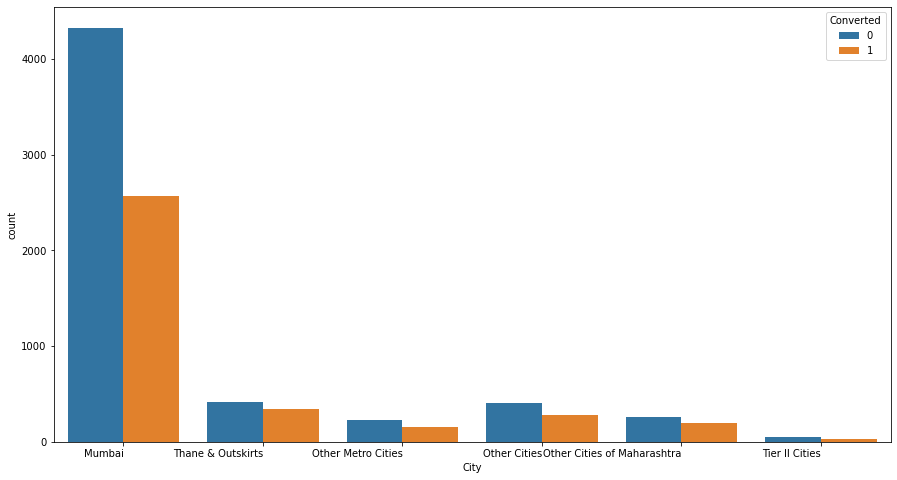

In [28]:
CountPlot(lead_df['City'],15,8,0)   # Applying the function to make countplot of 'City'

1. We can see that `Mumbai` has more potential leads then rest combined, while its conversion rate does seems to be on the lower end of spectrum.
2. While other cities though have lesser number of potential leads, yet the conversion rates are better.
3. Tier 2 cities have very low potential leads to draw any meaningfull insights.

In [29]:
#  Defining a custom function to Calculate the lead conversion rate for various labels present in the column

def ConvRate(x):
    convrate = pd.DataFrame()                                # Creating an empty dataframe 
    convrate[x] = lead_df[x].unique()                        # Adding all unique values of the columns into the dataframe
    Conversion_rate = []                                     # Creating an empty list
    for spl in lead_df[x].unique():                          # Iterating over all unique values of the columns
        
        spl_rate = len(lead_df[(lead_df['Converted'] == 1) & (lead_df[x] == spl)])/len(lead_df[lead_df[x] == spl]) 
    
        Conversion_rate.append(round(spl_rate*100,2))  # Calculating lead conversion rate, by dividing the total converted lead for the label by total leads availaible for the same and rounding it to 2 decimals  
        
    convrate['Conversion_rate'] = Conversion_rate      # Adding this value to our dataframe next to the label it belongs to
    
    convrate = convrate.sort_values(by = 'Conversion_rate', ascending = False) # sorting the dataframe based on Lead Conversion Rate
    
    print(convrate)   

In [30]:
ConvRate('City')  # Applying the function to calculate conversion rate for City

                          City  Conversion_rate
1            Thane & Outskirts            44.95
4  Other Cities of Maharashtra            43.98
2           Other Metro Cities            40.79
3                 Other Cities            40.23
0                       Mumbai            37.24
5               Tier II Cities            33.78


As we As we can see that,
1. Although `Mumbai` has a higher number of leads the conversion rate is among the lowest, 
2. Whereas `Thane & outskirts` have a second highest number of leads and the best conversion rate among all cities.

Now we will repeat the same procedure for all features, by using our custom defined functions wherever applicable

In [31]:
count('Specialization') 

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Here null values are best replaced by `undefined` since that strategy would be most ideal for our scenario

In [32]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan, 'undefined')

In [33]:
count('Specialization')

undefined                            3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Now we can see that most of the potential leads have not specified their `specialization`, it could be because they `don't have` any or maybe they `did not fill` this particular field,
Apart from it, most leads are from the `management sector` with the `finance domain` being the `most occurring`, while `services excellence` being the `least occuring`

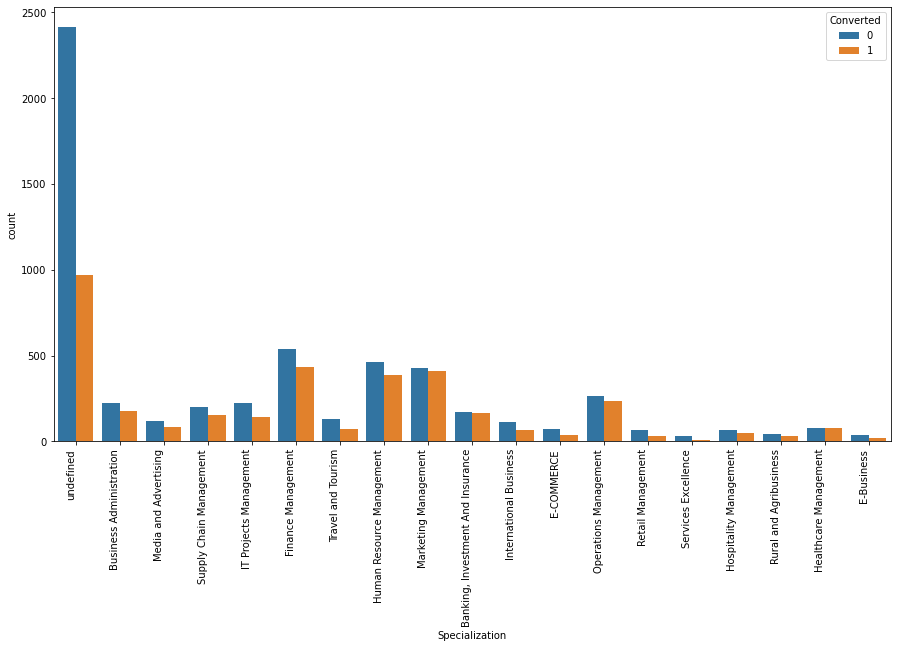

In [34]:
CountPlot(lead_df['Specialization'],15,8,90)

Countplot confirms the same as stated above, while it can also be noticed that, 
1. Undefined has pretty low conversion rate barely one third potential leads are getting converted, 
2. Management firms are doing better in terms of rate of conversion and total potential leads than any other type of specializations

In [35]:
ConvRate('Specialization')

                       Specialization  Conversion_rate
17              Healthcare Management            49.69
9   Banking, Investment And Insurance            49.41
8                Marketing Management            48.69
12              Operations Management            47.32
7           Human Resource Management            45.75
5                  Finance Management            44.67
1             Business Administration            44.42
3             Supply Chain Management            43.27
16             Rural and Agribusiness            42.47
15             Hospitality Management            42.11
2               Media and Advertising            41.87
4              IT Projects Management            38.25
18                         E-Business            36.84
10             International Business            35.96
11                         E-COMMERCE            35.71
6                  Travel and Tourism            35.47
13                  Retail Management            34.00
0         

1. `Marketing`, `finance` and `Human resources` based specializations have both good number of total leads and a very healthy conversion rates,
2. `Healthcare Management`, though have quite lower number of total leads, yet they lead the way for highest conversion rate, closely followed by other management speceializations.

In [36]:
count('Tags')

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

1. We can notice that `Will revert after reading the email` has highest number of potential leads, while `Recognition issue (DEC approval)`have lowest,
2. While the number of null values is also very high.

Here null values are best replaced by `undefined` since that strategy would be most ideal for our scenario,
Also it would fare better for our model if we were to segment these tags into more constrasting labels based on the attitude or desire expressed by potential leads. 

In [37]:
lead_df['Tags'] = lead_df['Tags'].replace(np.nan, 'undefined')

In [38]:
lead_df['Tags'] = lead_df['Tags'].replace(['number not provided','wrong number given','invalid number',
                                          'switched off','Ringing','opp hangup','Busy'],'circumventing') # Leads which are avoiding


lead_df['Tags'] = lead_df['Tags'].replace(['Recognition issue (DEC approval)',
                                           'Interested in other courses','Interested  in full time MBA',
                                           'University not recognized'],'in_dilemma') # Leads which are doubtfull to convert


lead_df['Tags'] = lead_df['Tags'].replace(['Lateral student','Interested in Next batch',
                                           'Closed by Horizzon','Will revert after reading the email',
                                           'Shall take in the next coming month'],'are_certain') # Leads who are certain to convert


lead_df['Tags'] = lead_df['Tags'].replace('Want to take admission but has financial problems','financial_issues') # Leads with financial issues


lead_df['Tags'] = lead_df['Tags'].replace(['Lost to EINS','in touch with EINS',
                                           'In confusion whether part time or DLP','Still Thinking'],'still_processing') # Leads which are still thinking


lead_df['Tags'] = lead_df['Tags'].replace(['Graduation in progress','Diploma holder (Not Eligible)',
                                           'Not doing further education','Already a student','Lost to Others'],'unlikely') # Leads which are unlikely to convert

In [39]:
count('Tags')

undefined           3353
are_certain         2440
circumventing       1819
unlikely             791
in_dilemma           633
still_processing     198
financial_issues       6
Name: Tags, dtype: int64

We can see that the above changes have been made successfully, also it can be seen that,'
1. High number of potential leads are certain or have expressed so in thier desire to enroll
2. although most have not specified anything, while very few leads have financial issue

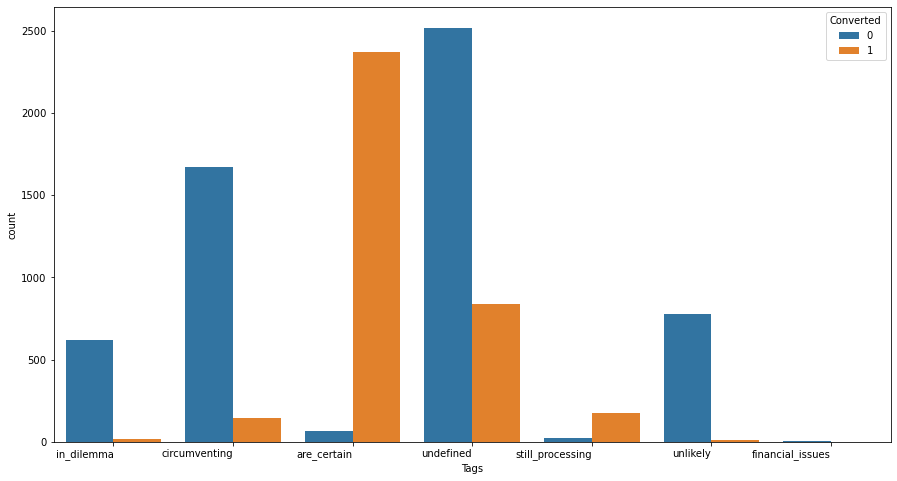

In [40]:
CountPlot(lead_df['Tags'],15,8,0)

1. `Certain` and `undefined` are more in numbers, while `certain` as expected show `very high number of converted leads`,
2. `Still processing` also show promising numbers even though it's total number of leads generated is quite lower than most

In [41]:
ConvRate('Tags')

               Tags  Conversion_rate
2       are_certain            97.21
4  still_processing            88.89
6  financial_issues            33.33
3         undefined            24.93
1     circumventing             8.08
0        in_dilemma             2.53
5          unlikely             1.52


1. We can confirm that `Certain` leads do tend to sucessfully convert by a whopping `97 percent rate`, and
2. As expected  `unlikely` has a very `low conversion rate`.

In [42]:
count('What matters most to you in choosing a course')

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

We cannot convert null values since there seems to be some kind of `skewness` associated with this feature lets confirm the same

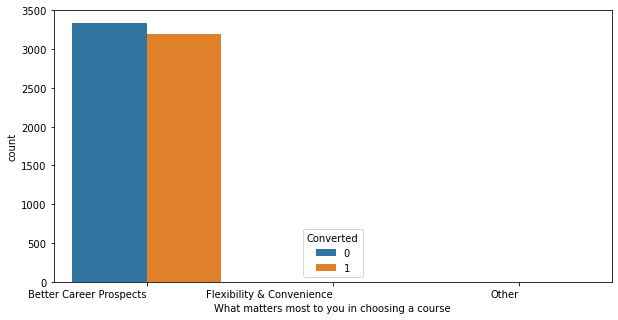

In [43]:
CountPlot(lead_df['What matters most to you in choosing a course'],10,5,0)

This feature is certainly `skewed` and also from buisness point of view it's `not of much significant`, so its better to `remove` it.

In [44]:
lead_df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)       # dropping the feature

In [45]:
lead_df.columns   # Checking for the modifications we just made

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
count('What is your current occupation')

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

Lets impute null values by `undefined` as it seems most appropriate, imputing with anytthing else could impart imbalance or skewness,
Also lets aggregate all features with overall value count less than 100 under the label of `others`.

In [47]:
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.NaN, 'undefined')

In [48]:
#  Defining a custom function to aggregate all features with value count less than 100, since this task would be repeated numerous time

def other(x):                                            
    l = []   
    for i in x.value_counts().index.tolist():  # Iterating over each label in our feature
        if x.value_counts()[i] < 100:          # If it's value count is 100, appending it to a list
            l.append(i)

    return(l)                                  # Returning the list

In [49]:
l1 = other(lead_df['What is your current occupation'])               # Passint the output of function to a list
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(l1, 'others')  

# replacing the labels of each item in the list with `others`

In [50]:
count('What is your current occupation')   # Ascertaining that our function worked

Unemployed              5600
undefined               2690
Working Professional     706
Student                  210
others                    34
Name: What is your current occupation, dtype: int64

`Unemployed` are most in number followed by `undefined` while others are least.


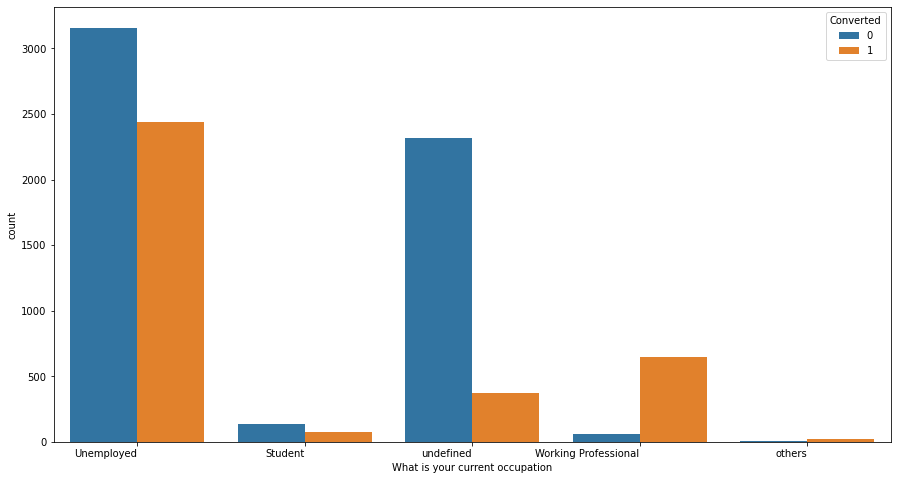

In [51]:
CountPlot(lead_df['What is your current occupation'],15,8,0)

Even though `Unemployed` are more in number and seems to have `average conversion rate`, while even though `working professionals` are less in numbers thier `conversion rate is very high`, where as `undefined` have `very poor conversion rate` despite `high number of potential leads`

In [52]:
ConvRate('What is your current occupation')

  What is your current occupation  Conversion_rate
3            Working Professional            91.64
4                          others            73.53
0                      Unemployed            43.59
1                         Student            37.14
2                       undefined            13.75


`Working Professional` has a `phenomenal conversion rate` of more than `91 percent`, whereas `students` and `others` are seemingly on the `lower end of the spectrum `.

In [53]:
count('Country')

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
Uganda                     2
Ghana                      2
Bangladesh                 2
Netherlands                2
Italy                      2
Asia/Pacific Region        2
China                      2
Philippines                2
Belgium                    2
Malaysia                   1
Vietnam                    1
Switzerland                1
Indonesia                  1
Liberia                    1
Tanzania      

We cannot convert null values since there seems to be some kind of `skewness` associated with this feature lets confirm the same

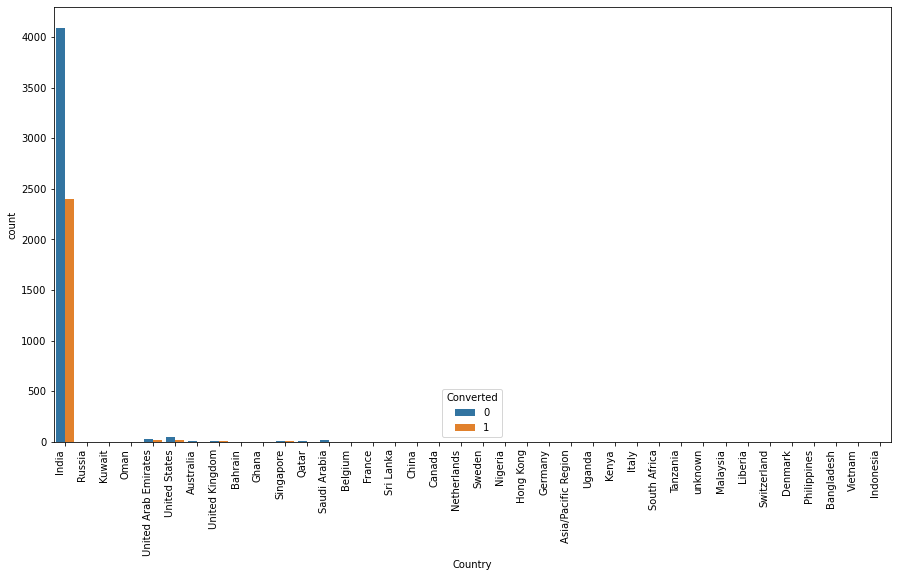

In [54]:
CountPlot(lead_df['Country'],15,8,90)

This feature is certainly `skewed` and also from buisness point of view it's `not of much significant`, so its better to `remove` it.

In [55]:
lead_df.drop('Country',axis = 1, inplace = True)  # dropping the column

In [56]:
lead_df.columns    # Ascertaining the changes made

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [57]:
count('Last Activity')

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Most leads are under the label `Email Opened`, so we will replace the null values with the same label, as the number of null values is very less, also we would group the variables with value count under 100 under one label as `others`

In [58]:
# Making the changes as discussed above

lead_df['Last Activity'] = lead_df['Last Activity'].replace(np.NaN, 'Email Opened')


l1 = other(lead_df['Last Activity'])


lead_df['Last Activity'] = lead_df['Last Activity'].replace(l1, 'others')

In [59]:
count('Last Activity')   # Looking over the changes we made

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

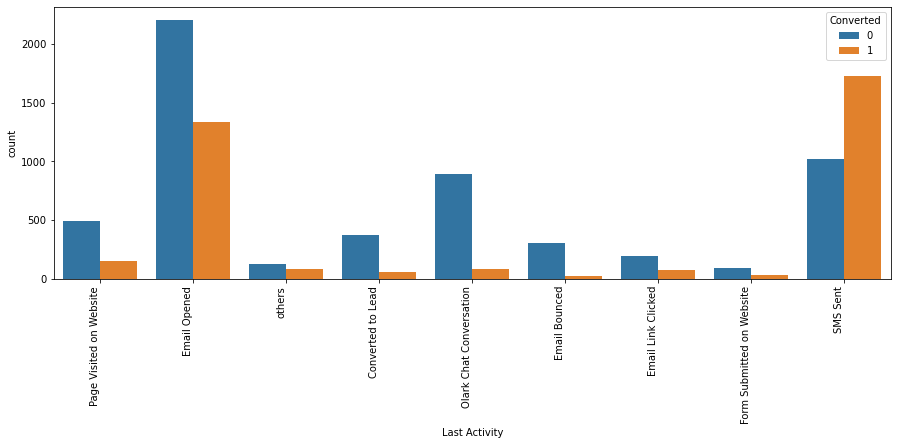

In [60]:
CountPlot(lead_df['Last Activity'],15,5,90)

`Email opened` has the largest share, followed by `SMS sent`, we can observe that `SMS` has significantly better conversion rate than any other label

In [61]:
ConvRate('Last Activity')

               Last Activity  Conversion_rate
8                   SMS Sent            62.91
2                     others            40.98
1               Email Opened            37.68
6         Email Link Clicked            27.34
7  Form Submitted on Website            24.14
0    Page Visited on Website            23.59
3          Converted to Lead            12.62
4    Olark Chat Conversation             8.63
5              Email Bounced             7.98


This confirms that `SMS sent` is indeed the label with `highest conversion rate`, `62.9 percent` to be precise while, `Email Bounced` have the `lowest`, that is rough `8 percent as expected

In [62]:
count('Lead Source')

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64

`Google` has `most` potential leads closely followed by `direct traffic`, while `blog has lowest`
so we will replace null values with Google,
also Google is also present in the feature under label of google too, so we need to rectify it

In [63]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace([np.NaN,'google'], 'Google')

l1 = other(lead_df['Lead Source'])


lead_df['Lead Source'] = lead_df['Lead Source'].replace(l1, 'others')   # Using the same method as done previously

In [64]:
count('Lead Source')  # Making sure changes weere made correctly

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
others                78
Name: Lead Source, dtype: int64

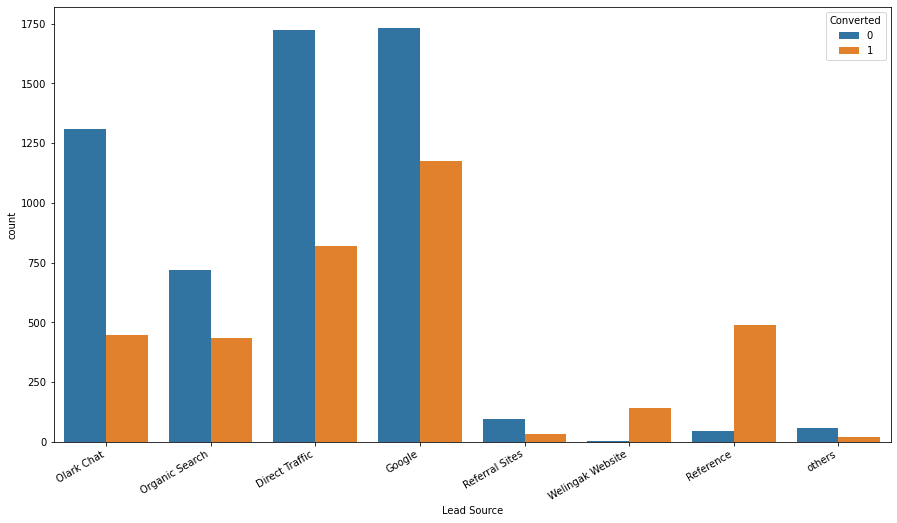

In [65]:
CountPlot(lead_df['Lead Source'],15 ,8,30)

In [66]:
ConvRate('Lead Source')

        Lead Source  Conversion_rate
5  Welingak Website            98.59
6         Reference            91.76
3            Google            40.43
1    Organic Search            37.78
2    Direct Traffic            32.17
7            others            28.21
0        Olark Chat            25.53
4    Referral Sites            24.80


`Welingak website` has a very high conversion rate despite low occurrence, same can be said about refrence while google has about 40% of conversion rate

In [67]:
count('Last Notable Activity')

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

No null values from here on, so we will jus club features with low occurence together as we did above

In [68]:
l1 = other(lead_df['Last Notable Activity'])
lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(l1, 'other')

In [69]:
count('Last Notable Activity')

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
other                       160
Name: Last Notable Activity, dtype: int64

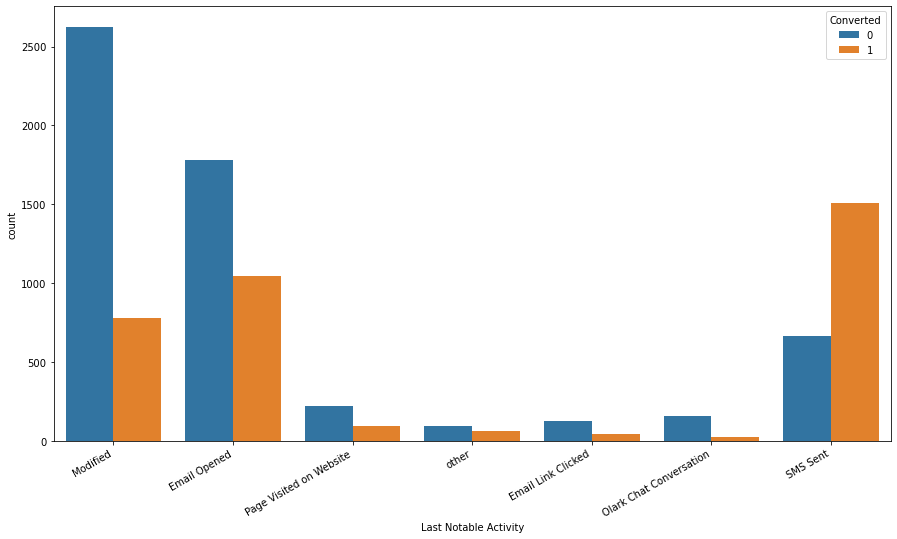

In [70]:
CountPlot(lead_df['Last Notable Activity'],15,8,30)

In [71]:
ConvRate('Last Notable Activity')

     Last Notable Activity  Conversion_rate
6                 SMS Sent            69.43
3                    other            39.38
1             Email Opened            36.93
2  Page Visited on Website            29.25
4       Email Link Clicked            26.01
0                 Modified            22.98
5  Olark Chat Conversation            13.66


From above analysis it can be noted that
1. `SMS sent` and `email opened` have both high occurence and good conversion rate
2. where as `modified` has the highest occurence and very low conversion rate

In [72]:
count('Do Not Email')

0    8506
1     734
Name: Do Not Email, dtype: int64

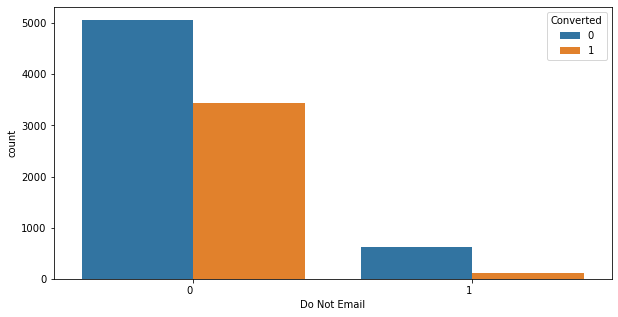

In [73]:
CountPlot(lead_df['Do Not Email'],10,5,0)

In [74]:
ConvRate('Do Not Email')

   Do Not Email  Conversion_rate
0             0            40.48
1             1            16.08


From the above analysis, it can be noted that those who have not opted for `Do not Email` have both a better conversion rate and number of occurrences than their counterparts

In [75]:
count('Do Not Call')

0    9238
1       2
Name: Do Not Call, dtype: int64

This Feature is most certainly skewed and needs to be dropped

In [76]:
lead_df.drop('Do Not Call', axis = 1, inplace = True) # Dropping the column

In [77]:
lead_df.columns   # Making sure changes are done correctly

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [78]:
count('Search')

0    9226
1      14
Name: Search, dtype: int64

This Feature is most certainly skewed and needs to be dropped

In [79]:
lead_df.drop('Search', axis = 1, inplace = True)  # Dropping

In [80]:
lead_df.columns  # Checking 

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [81]:
count('A free copy of Mastering The Interview')

0    6352
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

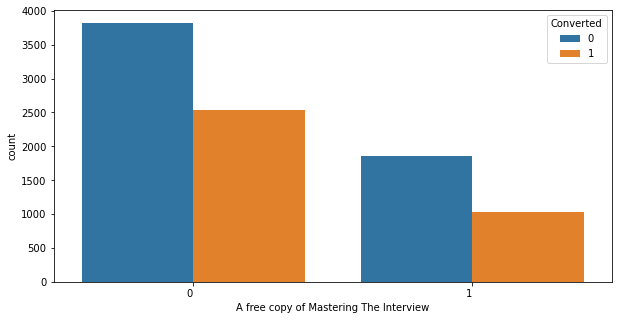

In [82]:
CountPlot(lead_df['A free copy of Mastering The Interview'],10,5,0)

In [83]:
ConvRate('A free copy of Mastering The Interview')

   A free copy of Mastering The Interview  Conversion_rate
0                                       0            39.85
1                                       1            35.66


Ones who have opted for the free copy have both lower occurrence and conversion rate (though only slightly) than their counterparts

In [84]:
count('Magazine')

0    9240
Name: Magazine, dtype: int64

This is a skewed column needs to be dropped

In [85]:
lead_df.drop('Magazine', axis = 1, inplace = True) # Dropping

In [86]:
lead_df.columns # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [87]:
count('Newspaper Article')

0    9238
1       2
Name: Newspaper Article, dtype: int64

This is a skewed column needs to be dropped

In [88]:
lead_df.drop('Newspaper Article', axis = 1, inplace = True) # Dropping

In [89]:
lead_df.columns # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [90]:
count('X Education Forums')


0    9239
1       1
Name: X Education Forums, dtype: int64

This is a skewed column needs to be dropped

In [91]:
lead_df.drop('X Education Forums', axis = 1, inplace = True) #v Dropping

In [92]:
lead_df.columns # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
count('Newspaper')

0    9239
1       1
Name: Newspaper, dtype: int64

This is a skewed column needs to be dropped

In [94]:
lead_df.drop('Newspaper', axis = 1, inplace = True)  # Dropping

In [95]:
lead_df.columns  # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [96]:
count('Digital Advertisement')

0    9236
1       4
Name: Digital Advertisement, dtype: int64

This is a skewed column needs to be dropped

In [97]:
lead_df.drop('Digital Advertisement', axis = 1, inplace = True) # Dropping

In [98]:
lead_df.columns  # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [99]:
count('Through Recommendations')

0    9233
1       7
Name: Through Recommendations, dtype: int64

This is a skewed column needs to be dropped

In [100]:
lead_df.drop('Through Recommendations', axis = 1, inplace = True)  # Dropping

In [101]:
lead_df.columns  # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [102]:
count('Receive More Updates About Our Courses')

0    9240
Name: Receive More Updates About Our Courses, dtype: int64

This is a skewed column needs to be dropped

In [103]:
lead_df.drop('Receive More Updates About Our Courses', axis = 1, inplace = True)   # Dropping

In [104]:
lead_df.columns   # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Update me on Supply Chain Content',
       'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [105]:
count('Update me on Supply Chain Content')

0    9240
Name: Update me on Supply Chain Content, dtype: int64

This is a skewed column needs to be dropped

In [106]:
lead_df.drop('Update me on Supply Chain Content', axis = 1, inplace = True)  # Dropping

In [107]:
lead_df.columns   # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Get updates on DM Content', 'City',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [108]:
count('Get updates on DM Content')

0    9240
Name: Get updates on DM Content, dtype: int64

This is a skewed column needs to be dropped

In [109]:
lead_df.drop('Get updates on DM Content', axis = 1, inplace = True)  # Dropping

In [110]:
lead_df.columns   # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [111]:
count('I agree to pay the amount through cheque')

0    9240
Name: I agree to pay the amount through cheque, dtype: int64

This is a skewed column needs to be dropped

In [112]:
lead_df.drop('I agree to pay the amount through cheque', axis = 1, inplace = True)  # Dropping

In [113]:
lead_df.columns    # Checking

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [114]:
count('Lead Origin')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [115]:
l1 = other(lead_df['Lead Origin'])

lead_df['Lead Origin'] = lead_df['Lead Origin'].replace(l1, 'other')

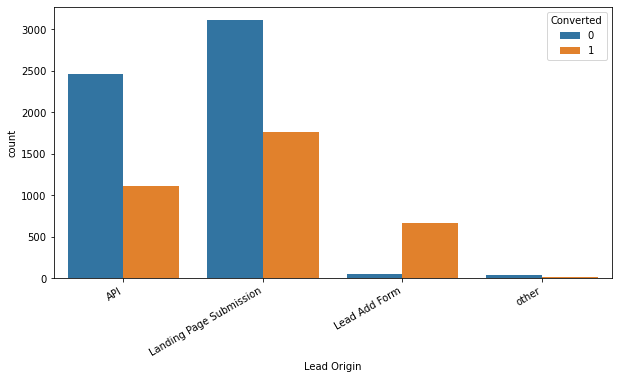

In [116]:
CountPlot(lead_df['Lead Origin'],10,5,30)

In [117]:
ConvRate('Lead Origin')

               Lead Origin  Conversion_rate
2            Lead Add Form            92.48
1  Landing Page Submission            36.19
0                      API            31.15
3                    other            25.00


`Landing page submission` has highest occurrence while `lead add form` has lowest

we are done with categorical data analysis, so lets move onto numerical analysis

#### 2.2 Dealing with Missing data   A.K.A   Null values for Numerical columns whilst performing univariate and bivariate analysis

In [118]:
lead_df.info()   # Checking Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [119]:
((lead_df.isnull().sum()/lead_df.shape[0])*100).sort_values(ascending = False )  # Checking nulll values 

Page Views Per Visit                      1.482684
TotalVisits                               1.482684
Last Notable Activity                     0.000000
A free copy of Mastering The Interview    0.000000
City                                      0.000000
Tags                                      0.000000
What is your current occupation           0.000000
Specialization                            0.000000
Last Activity                             0.000000
Total Time Spent on Website               0.000000
Converted                                 0.000000
Do Not Email                              0.000000
Lead Source                               0.000000
Lead Origin                               0.000000
dtype: float64

In [120]:
count('Converted')   # Analysing our target vriable

0    5679
1    3561
Name: Converted, dtype: int64

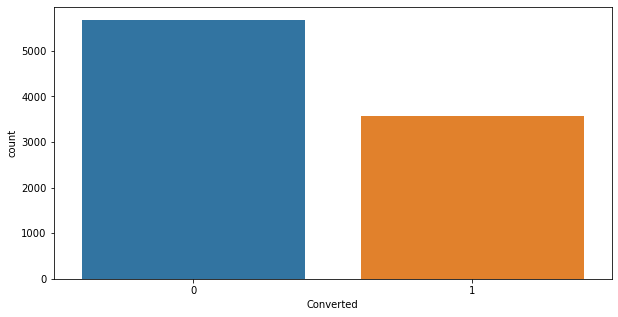

In [121]:
# Making a plot to see the total converted and unconverted lead

plt.figure(figsize = (10,5))
sns.countplot(lead_df['Converted'])
plt.show()

In [122]:
(len(lead_df[lead_df['Converted']==1])/len(lead_df['Converted']))*100    # Checking average conversion rate of our dataset 

38.53896103896104

In [123]:
count('Page Views Per Visit')

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
NaN       137
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
1.80       13
6.50       13
2.75       12
1.40       11
2.80        9
2.20        9
4.33        9
14.00       9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
15.00       4
1.83        4
2.60        4
1.43        4
1.71        4
3.40        4
1.38        3
5.67        3
16.00       3
1.57        3
4.75        3
4.25        3
1.78        3
1.23        2
3.75        2
1.56        2
2.22        2
1.14        2
2.71        2
5.40        2
2.09        2
5.25        2
3.20        2
2.83        2
5.33        2
1.22        2
3.60        2
7.50        2
2.63        1
8.21  

As we can see null values are present so we would replace them with a measure of central tendency

In [124]:
lead_df['Page Views Per Visit'].describe(percentiles = [0.01,0.05,0.95,0.99])   # Using describe function with custom percentiles

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
1%          0.000000
5%          0.000000
50%         2.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [125]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].replace(np.NAN,
                                        lead_df['Page Views Per Visit'].median())     # Treating missing values

In [126]:
count('Page Views Per Visit')   # Checking

0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [127]:
#  Defining a custom function to make a box plot for the selected feature for univariate analysis, since this task would be repeated numerous time

def BoxPlot1(a,b,c):                             # Our function will take 3 inputs,
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (b,c))                  # b and c being width and height of plot respectively,
    sns.boxplot(y = a)                           # a being the column to analyze
    plt.show()

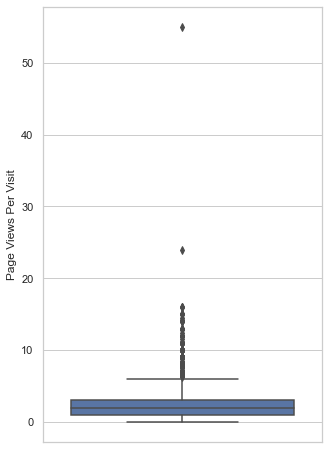

In [128]:
BoxPlot1(lead_df['Page Views Per Visit'],5,8)

As we can see that there are outliers present in the dataset, so we will clip the values to deal with them

In [129]:
lead_df['Page Views Per Visit'] = lead_df['Page Views Per Visit'].clip(upper = 9)   # Clipping the value at 99 percentile

In [130]:
lead_df['Page Views Per Visit'].describe(percentiles = [0.01,0.05,0.95,0.99])    # Checking

count    9240.000000
mean        2.329050
std         1.971347
min         0.000000
1%          0.000000
5%          0.000000
50%         2.000000
95%         6.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

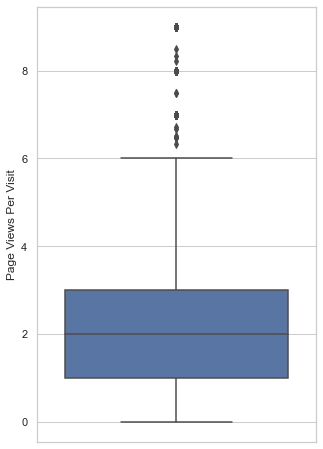

In [131]:
BoxPlot1(lead_df['Page Views Per Visit'],5,8)   # Again making box plot to ascertain 

As we can see outliers have been dealt with

In [132]:
#  Defining a custom function to make a box plot for the selected feature for bivariate analysis, since this task would be repeated numerous time

def BoxPlot2(a,b,c):
    sns.set_theme(style="whitegrid")                 # Our function will take 3 inputs,                                                                                                             
    plt.figure(figsize = (b,c))                      # b and c being width and height of plot respectively,
    sns.boxplot(y = a, x = lead_df['Converted'])     # a being the column to analyze
    plt.show()

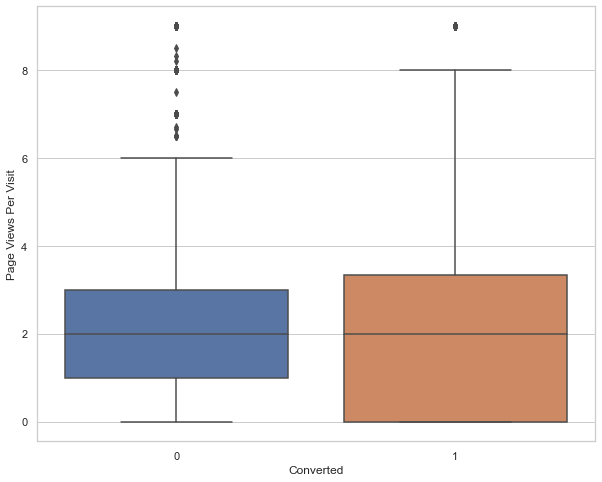

In [133]:
BoxPlot2(lead_df['Page Views Per Visit'],10,8)   # Bivariate analyis by comapring with target variable

There is not much to infer from here

In [134]:
#  Defining a custom function to make a bar plot for the selected feature for bivariate analysis, since this task would be repeated numerous time

def BarPlot(a,b,c):                                     # a,b,c have their usual meaning
    plt.figure(figsize = (b,c))
    sns.barplot(y = a, x = lead_df['Converted'])
    plt.show()

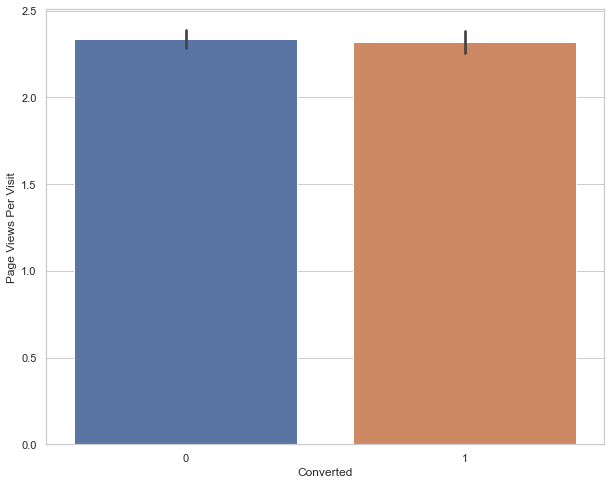

In [135]:
BarPlot(lead_df['Page Views Per Visit'],10,8)            # Bivariate analyis by comapring with target variable

Same as above nothing to infer here

In [136]:
count('TotalVisits')

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
27.0        5
25.0        5
24.0        5
22.0        3
26.0        2
29.0        2
28.0        2
115.0       1
54.0        1
43.0        1
30.0        1
32.0        1
74.0        1
251.0       1
41.0        1
141.0       1
42.0        1
55.0        1
Name: TotalVisits, dtype: int64

Lets take care of null values

In [137]:
lead_df['TotalVisits'].describe(percentiles = [0.01,0.05,0.75,.80,0.85,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
1%          0.000000
5%          0.000000
50%         3.000000
75%         5.000000
80%         5.000000
85%         6.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [138]:
lead_df['TotalVisits'] = lead_df['TotalVisits'].replace(np.NAN,
                                        lead_df['TotalVisits'].median())

In [139]:
count('TotalVisits')   # Checking

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

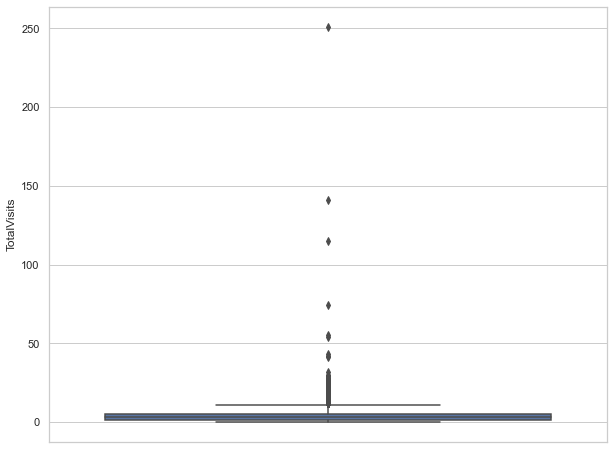

In [140]:
BoxPlot1(lead_df['TotalVisits'],10,8)

Lets treat outliers by clipping the values

In [141]:
lead_df['TotalVisits'] = lead_df['TotalVisits'].clip(upper = 10)

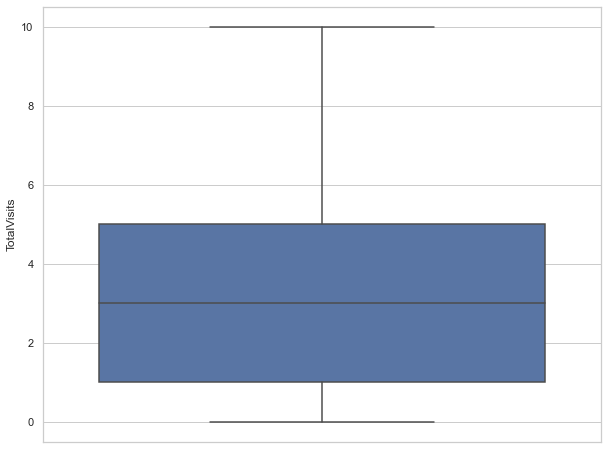

In [142]:
BoxPlot1(lead_df['TotalVisits'],10,8)

Outliers are taken care of

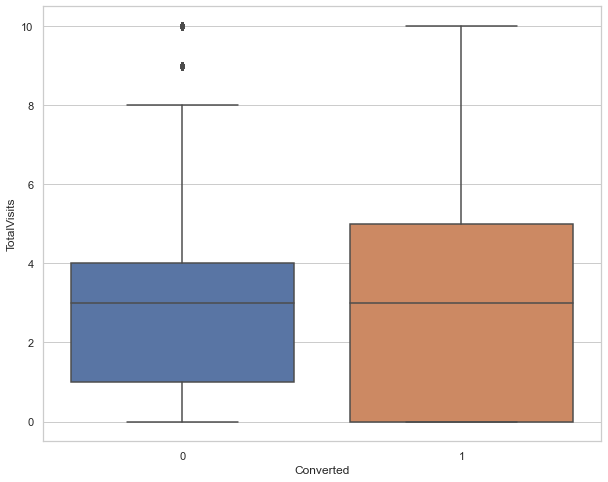

In [143]:
BoxPlot2(lead_df['TotalVisits'],10,8)

The median is a little higher and IQR is wider for converted, i.e more diverse and uniform values

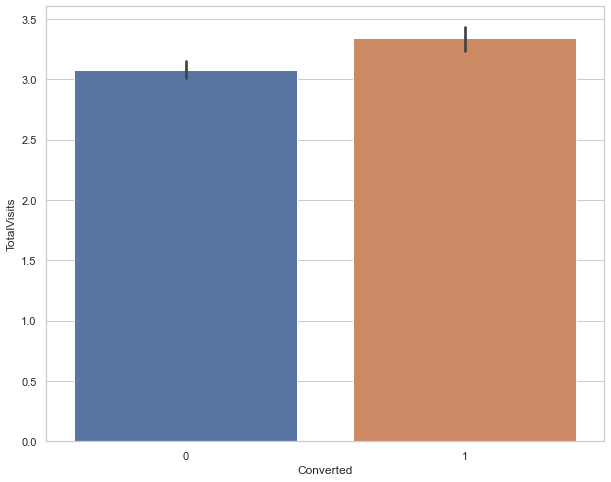

In [144]:
BarPlot(lead_df['TotalVisits'],10,8)

As we can see Converted leads are more for `totalvisits` than unconverted leads

In [145]:
(((lead_df.isnull().sum())*100)/lead_df.shape[0]).sort_values(ascending = False)     # Checking null values

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
City                                      0.0
Tags                                      0.0
What is your current occupation           0.0
Specialization                            0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Email                              0.0
Lead Source                               0.0
Lead Origin                               0.0
dtype: float64

So all null values have been dealt with

In [146]:
lead_df['Total Time Spent on Website'].describe(percentiles = [0.01,0.05,0.75,0.85,0.90,0.95,0.99])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
1%          0.000000
5%          0.000000
50%       248.000000
75%       936.000000
85%      1233.150000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

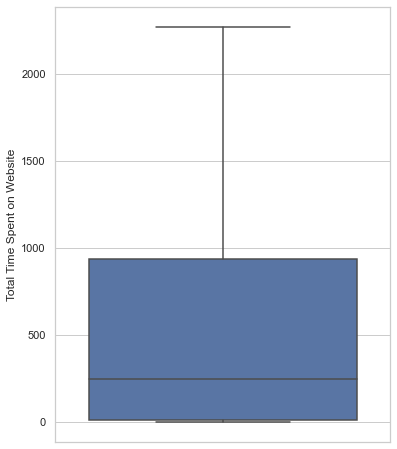

In [147]:
BoxPlot1(lead_df['Total Time Spent on Website'],6,8)

No outlier treatment required 

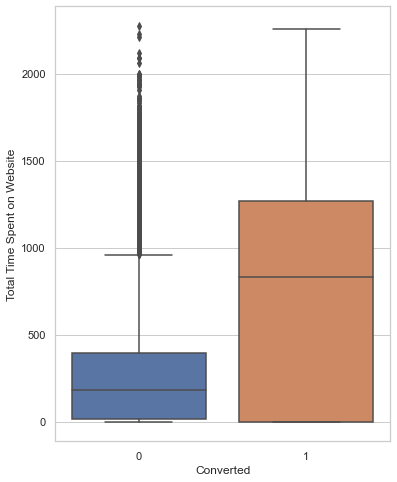

In [148]:
BoxPlot2(lead_df['Total Time Spent on Website'],6,8)

Median for converted is very high for `Total Time Spent on Website`, so higher the lead spends time on website more likely they are to convert

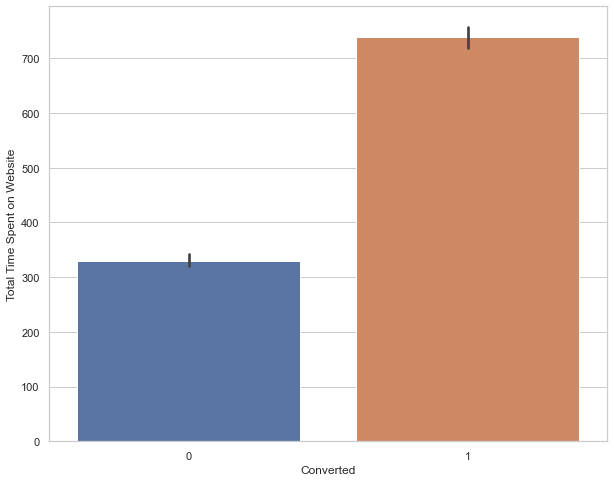

In [149]:
BarPlot(lead_df['Total Time Spent on Website'],10,8)

As we can see bar plot confirms the same conclusion from above,

In [150]:
Corr = lead_df.corr()    # Looking over correlation matrix for all numerical columns
Corr

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.135580,-0.000804,-0.046374,0.023875,0.055762
Converted,-0.135580,1.000000,0.045568,0.362483,-0.004603,-0.039820
TotalVisits,-0.000804,0.045568,1.000000,0.357773,0.768798,0.297519
Total Time Spent on Website,-0.046374,0.362483,0.357773,1.000000,0.336715,0.168298
Page Views Per Visit,0.023875,-0.004603,0.768798,0.336715,1.000000,0.292589
A free copy of Mastering The Interview,0.055762,-0.039820,0.297519,0.168298,0.292589,1.000000


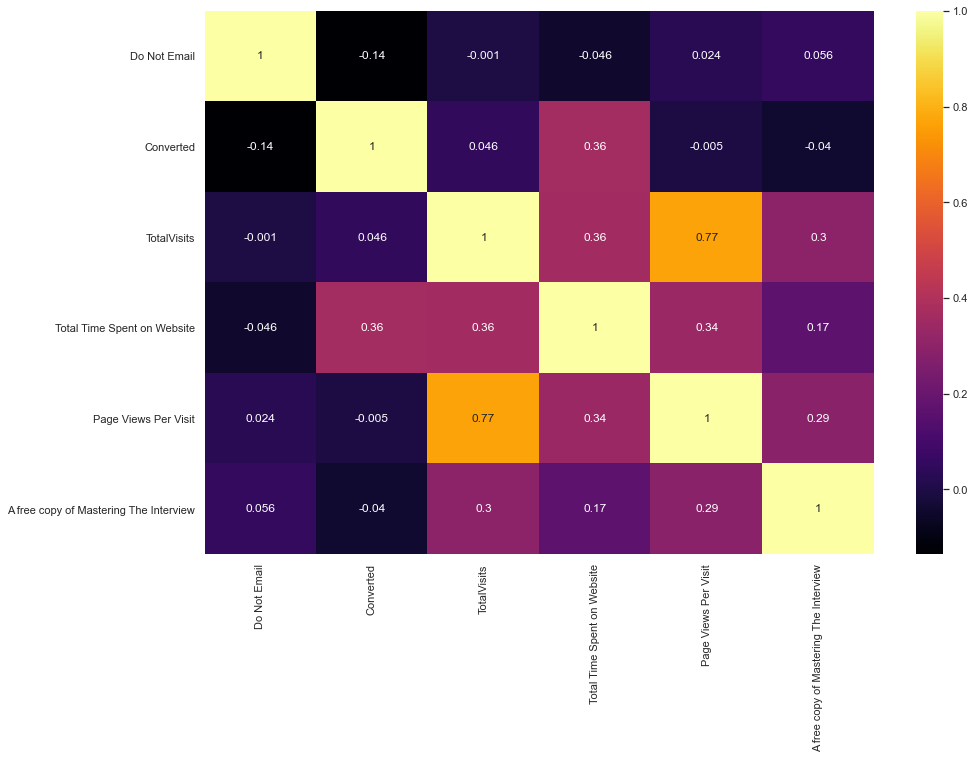

In [151]:
plt.figure(figsize = (15,10))                                # Plotting heatmaps for correlations between all numerical variables
sns.heatmap(round(Corr,3), cmap = 'inferno', annot = True)
plt.show()

From above two plots, it is evident that -:
1. `Total time spent on website` and `converted` are `positively correlated`
2. `Converted` and `do not Email` are `negatively correlated`

### 3. Model Preparation

#### 3.1 Data preprocessing

In [152]:
lead_df.info()   # Checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Tags                                    9240 non-null   obje

In [153]:
# Converting data type of all categorical columns to `category`

lead_df.iloc[:,[0,1,2,7,8,9,10,11,12,13]] = lead_df.iloc[:,[0,1,2,7,8,9,10,11,12,13]].astype('category')  

In [154]:
lead_df.info()  # Checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9240 non-null   category
 1   Lead Source                             9240 non-null   category
 2   Do Not Email                            9240 non-null   category
 3   Converted                               9240 non-null   int64   
 4   TotalVisits                             9240 non-null   float64 
 5   Total Time Spent on Website             9240 non-null   int64   
 6   Page Views Per Visit                    9240 non-null   float64 
 7   Last Activity                           9240 non-null   category
 8   Specialization                          9240 non-null   category
 9   What is your current occupation         9240 non-null   category
 10  Tags                                    9240 non

In [155]:
lead_df = pd.get_dummies(lead_df, drop_first = True)        # Using inbuilt functions to generate dummy variables
lead_df.info()                                              # Checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int64  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9240 non-null   uint8  
 6   Lead Origin_other                                     9240 non-null   uint8  
 7   Lead Source_Google                                    9240 non-null   uint8  
 8   Lead Source_Olark Chat                                9240

Process has been successful, no lets go over various other metrics

In [156]:
lead_df.shape

(9240, 63)

In [157]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_undefined,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_still_processing,Tags_undefined,Tags_unlikely,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 3.2 Splitting the dataset

In [158]:
# Splitting the dataset into X (independent) and y (dependent)

from sklearn.model_selection import train_test_split

X = lead_df.drop('Converted', axis=1)

y = lead_df['Converted']

In [159]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_undefined,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_still_processing,Tags_undefined,Tags_unlikely,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [160]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [161]:
# Performing a train-test split on our dataset with 70% to 30% ratios respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [162]:
X_train.shape

(6468, 62)

In [163]:
X_test.shape

(2772, 62)

In [164]:
# Scaling the dataset to ensure comparable scale

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [165]:
# Scaling all variables except dummy and 'yes-no' (0 & 1 in this case) variables

n_col= ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

n_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [166]:
X_train[n_col] = scale.fit_transform(X_train[n_col])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_undefined,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_still_processing,Tags_undefined,Tags_unlikely,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
1871,-1.149699,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6795,0.299722,0.005716,-0.503379,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0
3516,0.662077,-0.691418,0.092260,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0.662077,1.365219,1.364995,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3934,-1.149699,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [167]:
X_train.describe()     # Making sure that the dataset has been successfully scaled

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_undefined,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_still_processing,Tags_undefined,Tags_unlikely,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
count,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,-6.206813e-17,-1.609377e-16,-4.136731e-17,0.528139,0.079468,0.005257,0.320810,0.190167,0.121058,0.060297,0.014224,0.014069,0.007885,0.078386,0.036333,0.028293,0.381262,0.012678,0.102195,0.072047,0.300402,0.020717,0.043599,0.005720,0.012987,0.105442,0.015615,0.013451,0.091682,0.037260,0.018707,0.093383,0.020563,0.057205,0.010823,0.007267,0.004793,0.037570,0.021336,0.367502,0.605133,0.077613,0.003556,0.292672,0.199443,0.000618,0.069728,0.020254,0.362709,0.085962,0.076376,0.049629,0.040816,0.079314,0.007885,0.311843,0.305349,0.367811,0.018553,0.035869,0.237477,0.016543
std,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.072318,0.466824,0.392463,0.326219,0.238054,0.118422,0.117786,0.088453,0.268799,0.187131,0.165822,0.485734,0.111888,0.302929,0.258586,0.458468,0.142448,0.204218,0.075423,0.113227,0.307146,0.123991,0.115204,0.288599,0.189414,0.135500,0.290991,0.141926,0.232251,0.103475,0.084940,0.069069,0.190168,0.144512,0.482162,0.488860,0.267582,0.059530,0.455024,0.399613,0.024862,0.254708,0.140877,0.480819,0.280329,0.265619,0.217194,0.197880,0.270248,0.088453,0.463282,0.460591,0.482247,0.134950,0.185978,0.425570,0.127561
min,-1.149699e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

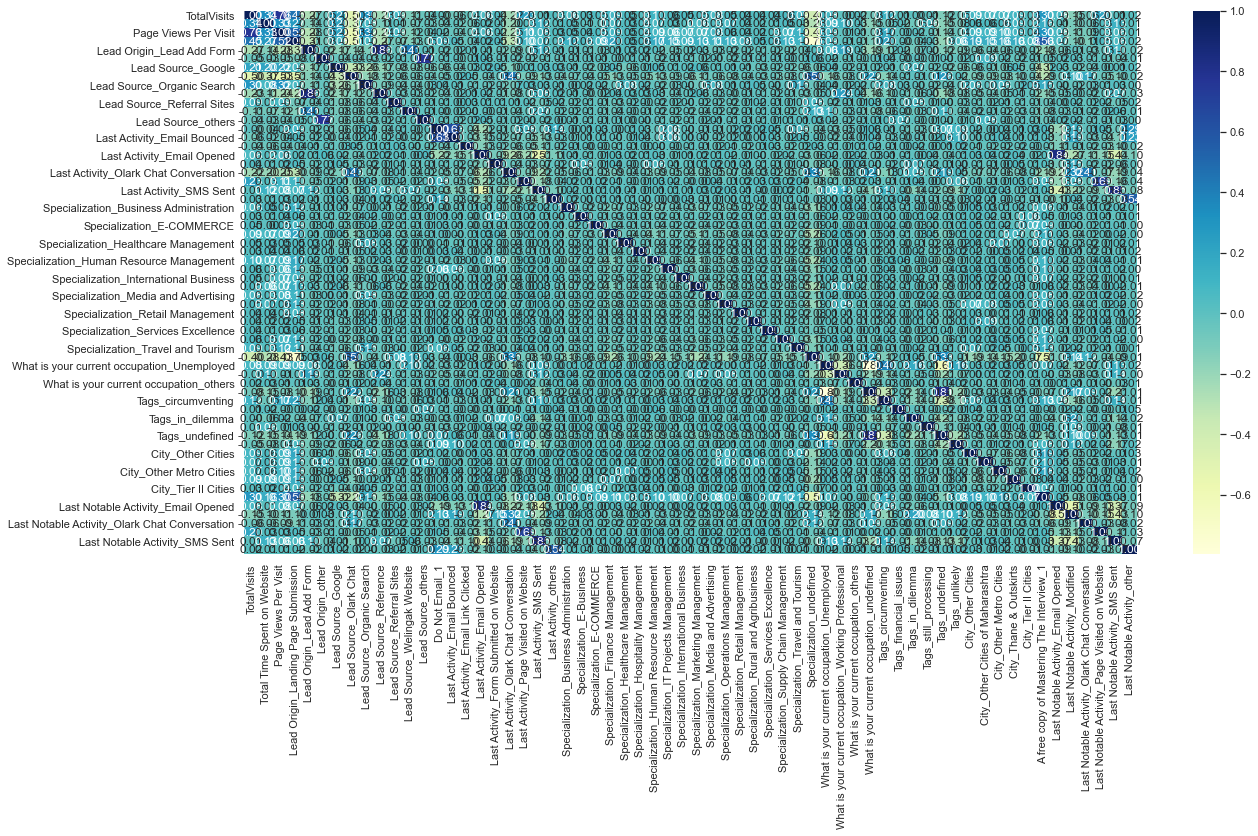

In [168]:
# Plotting a heatmap of correlations for our train dataset 

plt.figure(figsize = (20, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu", fmt = '.2f')
plt.show()

Here we can observe that many variables are highly correlated with each other and we shall deal with them accordingly during model selection

### 4. Model Training 

#### 4.1 Training First Model

In [169]:
# Using the class LogisticRegression we will build a function

from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE

lr =  LogisticRegression()

rfe = RFE(lr, 15)                                   #  using RFE prioritizing 15 variables, to begin with           
rfe = rfe.fit(X_train, y_train)

In [170]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))   # Creating list with column name and thier RFE ranking

[('TotalVisits', False, 27),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_other', False, 22),
 ('Lead Source_Google', False, 43),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_others', False, 18),
 ('Do Not Email_1', True, 1),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Clicked', False, 31),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Olark Chat Conversation', False, 2),
 ('Last Activity_Page Visited on Website', False, 35),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_others', False, 16),
 ('Specialization_Business Administration', False, 48),
 ('Specializat

In [171]:
tr_col = X_train.columns[rfe.support_]  # Exctracting top 15 columns upon which our model is to be built
tr_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_1', 'Last Activity_SMS Sent',
       'What is your current occupation_undefined', 'Tags_circumventing',
       'Tags_financial_issues', 'Tags_in_dilemma', 'Tags_undefined',
       'Tags_unlikely', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_other'],
      dtype='object')

In [172]:
X_train_rfe = X_train[tr_col]    # Exctracting the dataset for those 15 columns

In [173]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)  # adding a constant else the intercept will through origin by default

In [174]:
lr1 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr1.fit()                                                              # training the model 
res.summary()                                                                # checking statical summary of the model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.4
Date:                Wed, 13 Oct 2021   Deviance:                       2520.7
Time:                        23:54:10   Pearson chi2:                 7.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         2.9690      0.169     17.608      0.000       2.639       3.300
Total Time Spent on Website                   1.0005      0.059     16.888      0.000       0.884       1.117
Lead Origin_Lead Add Form                     1.2205      0.298      4.102      0.000       0.637       1.804
Lead Source_Olark Chat                        0.7951      0.148      5.369      0.000       0.505       1.085
Lead Source_Welingak Website                  2.5636      0.787      3.258      0.001       1.021       4.106
Do Not Email_1                               -1.3293      0.274     -4.858      0.000      -1.866      -0.793
Last Activity_SMS Sent                        1.5469      0.226      6.856      0.000       1.105       1.989
What is your current occupation_undefined    -2.2934      0.145    -15.834      0.000      -2.577      -2.009
Tags_circumventing                           -6.9816      0.218    -31.966      0.000      -7.410      -6.554
Tags_financial_issues                        -4.0058      1.167     -3.433      0.001      -6.293      -1.719
Tags_in_dilemma                              -6.4064      0.344    -18.641      0.000      -7.080      -5.733
Tags_undefined                               -2.9796      0.185    -16.082      0.000      -3.343      -2.616
Tags_unlikely                                -7.1551      0.400    -17.883      0.000      -7.939      -6.371
Last Notable Activity_Modified               -1.0611      0.151     -7.022      0.000      -1.357      -0.765
Last Notable Activity_SMS Sent                0.6705      0.261      2.573      0.010       0.160       1.181
Last Notable Activity_other                   1.0812      0.438      2.466      0.014       0.222       1.941
=============================================================================================================
"""

All p values are within specified limit

In [175]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.08
5,Last Activity_SMS Sent,5.94
10,Tags_undefined,5.09
6,What is your current occupation_undefined,4.59
12,Last Notable Activity_Modified,2.20
2,Lead Source_Olark Chat,1.53
1,Lead Origin_Lead Add Form,1.39
3,Lead Source_Welingak Website,1.32
4,Do Not Email_1,1.26
0,Total Time Spent on Website,1.24


Now we can see that `Last Notable Activity_SMS Sent	` have high VIF hence we will drop it and build a 2nd Model 

#### 4.2 Training Second Model

In [177]:
X_train_rfe.drop('Last Notable Activity_SMS Sent', axis =1, inplace = True)

In [178]:
lr2 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.7
Date:                Wed, 13 Oct 2021   Deviance:                       2527.4
Time:                        23:54:10   Pearson chi2:                 7.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         3.0770      0.167     18.473      0.000       2.751       3.404
Total Time Spent on Website                   1.0000      0.059     16.972      0.000       0.884       1.115
Lead Origin_Lead Add Form                     1.2385      0.299      4.140      0.000       0.652       1.825
Lead Source_Olark Chat                        0.8185      0.148      5.540      0.000       0.529       1.108
Lead Source_Welingak Website                  2.5343      0.788      3.216      0.001       0.990       4.079
Do Not Email_1                               -1.2895      0.273     -4.715      0.000      -1.826      -0.753
Last Activity_SMS Sent                        2.0313      0.123     16.451      0.000       1.789       2.273
What is your current occupation_undefined    -2.3187      0.145    -16.032      0.000      -2.602      -2.035
Tags_circumventing                           -6.9613      0.219    -31.830      0.000      -7.390      -6.533
Tags_financial_issues                        -4.0276      1.194     -3.374      0.001      -6.367      -1.688
Tags_in_dilemma                              -6.4425      0.344    -18.722      0.000      -7.117      -5.768
Tags_undefined                               -3.0232      0.187    -16.165      0.000      -3.390      -2.657
Tags_unlikely                                -7.2356      0.400    -18.084      0.000      -8.020      -6.451
Last Notable Activity_Modified               -1.2899      0.125    -10.291      0.000      -1.536      -1.044
Last Notable Activity_other                   0.9858      0.439      2.247      0.025       0.126       1.846
=============================================================================================================
"""

All p values are within specified limit

In [179]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [180]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
10,Tags_undefined,5.05
6,What is your current occupation_undefined,4.58
12,Last Notable Activity_Modified,1.79
2,Lead Source_Olark Chat,1.50
1,Lead Origin_Lead Add Form,1.37
5,Last Activity_SMS Sent,1.37
3,Lead Source_Welingak Website,1.32
4,Do Not Email_1,1.26
0,Total Time Spent on Website,1.23
7,Tags_circumventing,1.21


Now we can see that `Tags_undefined	` have high VIF hence we will drop it and build a 3rd Model 

#### 4.3 Training Third Model

In [181]:
X_train_rfe.drop('Tags_undefined', axis =1, inplace = True)

In [182]:
lr3 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1421.7
Date:                Wed, 13 Oct 2021   Deviance:                       2843.5
Time:                        23:54:10   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.7468      0.105     16.606      0.000       1.541       1.953
Total Time Spent on Website                   1.0338      0.056     18.430      0.000       0.924       1.144
Lead Origin_Lead Add Form                     2.0272      0.252      8.031      0.000       1.532       2.522
Lead Source_Olark Chat                        0.4246      0.140      3.026      0.002       0.150       0.700
Lead Source_Welingak Website                  0.4791      0.760      0.630      0.528      -1.010       1.968
Do Not Email_1                               -1.8720      0.256     -7.311      0.000      -2.374      -1.370
Last Activity_SMS Sent                        1.8967      0.118     16.076      0.000       1.665       2.128
What is your current occupation_undefined    -3.7958      0.122    -31.230      0.000      -4.034      -3.558
Tags_circumventing                           -5.5515      0.170    -32.563      0.000      -5.886      -5.217
Tags_financial_issues                        -3.0499      1.136     -2.686      0.007      -5.276      -0.824
Tags_in_dilemma                              -5.1454      0.320    -16.098      0.000      -5.772      -4.519
Tags_unlikely                                -5.8904      0.379    -15.532      0.000      -6.634      -5.147
Last Notable Activity_Modified               -1.0696      0.111     -9.628      0.000      -1.287      -0.852
Last Notable Activity_other                   1.1367      0.402      2.826      0.005       0.348       1.925
=============================================================================================================
"""

Now we can see that `Lead Source_Welingak Website` have high p value hence we will drop it and build a 4th Model 

In [183]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [184]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
11,Last Notable Activity_Modified,1.78
6,What is your current occupation_undefined,1.54
2,Lead Source_Olark Chat,1.42
1,Lead Origin_Lead Add Form,1.37
5,Last Activity_SMS Sent,1.33
4,Do Not Email_1,1.25
0,Total Time Spent on Website,1.23
3,Lead Source_Welingak Website,1.22
7,Tags_circumventing,1.19
9,Tags_in_dilemma,1.16


All VIF values under control

#### 4.4 Training Fourth Model

In [185]:
X_train_rfe.drop('Lead Source_Welingak Website', axis =1, inplace = True)

In [186]:
lr4 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial())
res = lr4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1422.0
Date:                Wed, 13 Oct 2021   Deviance:                       2843.9
Time:                        23:54:10   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         1.7485      0.105     16.622      0.000       1.542       1.955
Total Time Spent on Website                   1.0342      0.056     18.430      0.000       0.924       1.144
Lead Origin_Lead Add Form                     2.0813      0.241      8.650      0.000       1.610       2.553
Lead Source_Olark Chat                        0.4245      0.140      3.024      0.002       0.149       0.700
Do Not Email_1                               -1.8709      0.256     -7.317      0.000      -2.372      -1.370
Last Activity_SMS Sent                        1.8985      0.118     16.094      0.000       1.667       2.130
What is your current occupation_undefined    -3.7978      0.122    -31.244      0.000      -4.036      -3.560
Tags_circumventing                           -5.5569      0.170    -32.615      0.000      -5.891      -5.223
Tags_financial_issues                        -3.0636      1.132     -2.707      0.007      -5.282      -0.845
Tags_in_dilemma                              -5.1487      0.320    -16.109      0.000      -5.775      -4.522
Tags_unlikely                                -5.8930      0.379    -15.538      0.000      -6.636      -5.150
Last Notable Activity_Modified               -1.0712      0.111     -9.646      0.000      -1.289      -0.854
Last Notable Activity_other                   1.1386      0.402      2.833      0.005       0.351       1.926
=============================================================================================================
"""

All p values are under control

In [187]:
X_2 = X_train_rfe.drop(['const'], axis=1)  # Dropping const because it increases the VIF for all other featuers

In [188]:
vif = pd.DataFrame()                                                    # Making a dataframe with name VIF,
X = X_2                                                                 # Storing values of X_2 in X,
vif['Features'] = X.columns                                                    # Storing all names columns of X in a new column,
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]      # Calculating VIF for all columns,
vif['VIF'] = round(vif['VIF'], 2)                                              # Rounding off all VIF values,
vif = vif.sort_values(by = "VIF", ascending = False)                    # Sorting all columns by VIF values in descending order.
vif

,Features,VIF
10,Last Notable Activity_Modified,1.78
5,What is your current occupation_undefined,1.54
2,Lead Source_Olark Chat,1.42
4,Last Activity_SMS Sent,1.33
3,Do Not Email_1,1.25
0,Total Time Spent on Website,1.22
6,Tags_circumventing,1.19
1,Lead Origin_Lead Add Form,1.17
8,Tags_in_dilemma,1.16
9,Tags_unlikely,1.16


All VIF values are under control

Now we can see that all variables have p values and VIF values under the specified limit of 0.05 and 5 respectively

We can see that all coefficients have p values less than 0.05 (our specified significance level), for the hypothesis :-

`null hypothesis` ---- > H0: all coefficients  in equation:
                             logit(p) = β0 + β1* X1 + … + βn * Xn 
                             are equal to 0 or are `insignificant`

`alternate hypothesis` ---->  H1: all coefficients are not equal to 0 or are `significant`

i.e we will `reject the Null hypothesis` which means that all our `coefficients are significant`

#### 4.5 Parameters of model

In [189]:
print(res.params)

const                                        1.748483
Total Time Spent on Website                  1.034173
Lead Origin_Lead Add Form                    2.081347
Lead Source_Olark Chat                       0.424474
Do Not Email_1                              -1.870891
Last Activity_SMS Sent                       1.898454
What is your current occupation_undefined   -3.797782
Tags_circumventing                          -5.556923
Tags_financial_issues                       -3.063557
Tags_in_dilemma                             -5.148652
Tags_unlikely                               -5.892963
Last Notable Activity_Modified              -1.071245
Last Notable Activity_other                  1.138596
dtype: float64


### 5.  Making Predictions

In [190]:
X_2.columns   # Having a look at all columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Do Not Email_1', 'Last Activity_SMS Sent',
       'What is your current occupation_undefined', 'Tags_circumventing',
       'Tags_financial_issues', 'Tags_in_dilemma', 'Tags_unlikely',
       'Last Notable Activity_Modified', 'Last Notable Activity_other'],
      dtype='object')

In [191]:
y_train_pred = (res.predict(X_train_rfe)).values.reshape(-1)    # Making predictions on training dataset and reshaping it
y_train_pred

array([0.0133923 , 0.85250625, 0.01631836, ..., 0.77856622, 0.00339859,
       0.02629584])

In [192]:
y_train_final_pred = pd.DataFrame({'Converted':y_train.values, 'probability_to_convert':y_train_pred})
y_train_final_pred['Prospect ID'] = y_train.index
y_train_final_pred.head()

,Converted,probability_to_convert,Prospect ID
0,0,0.013392,1871
1,0,0.852506,6795
2,0,0.016318,3516
3,0,0.377984,8105
4,0,0.546387,3934


In [193]:
# setting the cutoff limit to 0.5 

y_train_final_pred['Predicted'] = y_train_final_pred.probability_to_convert.map(lambda x: 1 if x > 0.5 else 0)


In [194]:
y_train_final_pred.head()   # Checking

,Converted,probability_to_convert,Prospect ID,Predicted
0,0,0.013392,1871,0
1,0,0.852506,6795,1
2,0,0.016318,3516,0
3,0,0.377984,8105,0
4,0,0.546387,3934,1


### 6.  Preliminary train model

In [195]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.Predicted )
print(confusion)

[[3750  252]
 [ 307 2159]]


In [196]:
# Predicted     not_converted    converted
# Actual
# not_converted        3270      365
# converted            579       708  

In [197]:
# Overall accuracy of model

print(metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.Predicted))


0.9135745207173779


In [198]:
# Elements of Confusion matrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [199]:
TP / float(TP+FN)      # Sensitivity

0.875506893755069

In [200]:
TN / float(TN+FP)      # Specificity

0.9370314842578711

In [201]:
FP/ float(TN+FP)       # FPR (FALSE POSITIVE RATE)

0.06296851574212893

In [202]:
TP / float(TP+FP)      # positive predicted value

0.8954790543343011

In [203]:
TN / float(TN+ FN)     # negitive predicted value

0.9243283214197683

### 7.  Making ROC

In [204]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [205]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_final_pred.Converted, y_train_final_pred.probability_to_convert, 
                                         drop_intermediate = False )

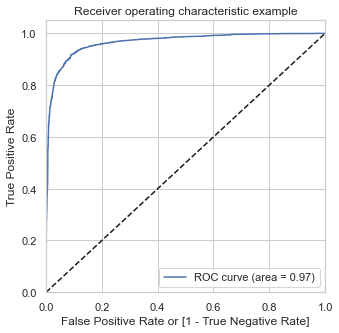

In [206]:
draw_roc(y_train_final_pred.Converted, y_train_final_pred.probability_to_convert)

Our ROC curve covers 0.97 times area, which is a very good score since the closest the score is to 1, better is our predective model 

Finding Optimal Cutoff

In [207]:
# Different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final_pred[i]= y_train_final_pred.probability_to_convert.map(lambda x: 1 if x > i else 0)
y_train_final_pred.head()

,Converted,probability_to_convert,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.013392,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.852506,6795,1,1,1,1,1,1,1,1,1,1,0
2,0,0.016318,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.377984,8105,0,1,1,1,1,0,0,0,0,0,0
4,0,0.546387,3934,1,1,1,1,1,1,1,0,0,0,0


In [208]:
# Calculating accuracy, sensitivity and specificity.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.856524  0.961476  0.791854
0.2   0.2  0.898887  0.940795  0.873063
0.3   0.3  0.908318  0.923763  0.898801
0.4   0.4  0.912801  0.896999  0.922539
0.5   0.5  0.913575  0.875507  0.937031
0.6   0.6  0.914966  0.849959  0.955022
0.7   0.7  0.914502  0.835361  0.963268
0.8   0.8  0.892239  0.751419  0.979010
0.9   0.9  0.862554  0.655718  0.990005


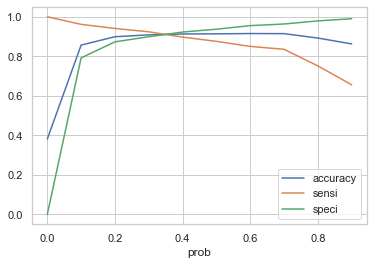

In [209]:
# Accuracy, sensitivity and specificity trade-off.


cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


#### From the curve above, 0.3 is the optimum point to take as cutoff probability.

In [210]:
y_train_final_pred['final_Predicted'] =  y_train_final_pred.probability_to_convert.map( lambda x: 1 if x > 0.3 else 0)

y_train_final_pred.head()

,Converted,probability_to_convert,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.013392,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.852506,6795,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.016318,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.377984,8105,0,1,1,1,1,0,0,0,0,0,0,1
4,0,0.546387,3934,1,1,1,1,1,1,1,0,0,0,0,1


### 7.  Metrics of final train model

In [211]:

metrics.accuracy_score(y_train_final_pred.Converted, y_train_final_pred.final_Predicted)

0.9083178726035869

In [212]:
c_matrix_2 = metrics.confusion_matrix(y_train_final_pred.Converted, y_train_final_pred.final_Predicted )
c_matrix_2 

array([[3597,  405],
       [ 188, 2278]], dtype=int64)

In [213]:
TP = c_matrix_2[1,1] # true positive 
TN = c_matrix_2[0,0] # true negatives
FP = c_matrix_2[0,1] # false positives
FN = c_matrix_2[1,0] # false negatives

In [214]:
# Sensitivity

TP / float(TP+FN)

0.9237631792376317

In [215]:
# Specificity

TN / float(TN+FP)

0.8988005997001499

In [216]:
# False postive rate

print(FP/ float(TN+FP))

0.10119940029985007


In [217]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8490495713753261


In [218]:
# Negative predictive value

print (TN / float(TN+ FN))

0.950330250990753


In [219]:

c_matrix = metrics.confusion_matrix(y_train_final_pred.Converted,y_train_final_pred.final_Predicted )
c_matrix

array([[3597,  405],
       [ 188, 2278]], dtype=int64)

In [220]:
TP = c_matrix[1,1] # true positive 
TN = c_matrix[0,0] # true negatives
FP = c_matrix[0,1] # false positives
FN = c_matrix[1,0] # false negatives

In [221]:
from sklearn.metrics import precision_score, recall_score

In [222]:
# Precision

precision_score(y_train_final_pred.Converted , y_train_final_pred.final_Predicted)

0.8490495713753261

In [223]:
# Recall

recall_score(y_train_final_pred.Converted, y_train_final_pred.final_Predicted)

0.9237631792376317

In [224]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_final_pred.Converted, y_train_final_pred.probability_to_convert)

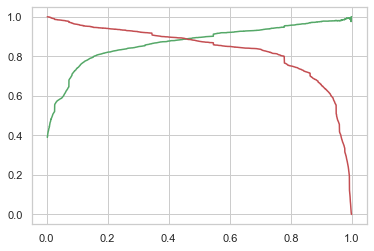

In [225]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### 8. Test model

In [226]:
#  Checking Numerical columns excluding target variables

n_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [227]:
# Scaling Test data set

X_test[n_col] = scale.transform(X_test[n_col])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_other,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_others,Do Not Email_1,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_undefined,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_others,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_still_processing,Tags_undefined,Tags_unlikely,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_1,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_other
4269,1.749143,0.964504,2.892276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2376,-1.149699,-0.885371,-1.180474,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7766,0.662077,-0.777416,1.364995,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9199,-1.149699,-0.885371,-1.180474,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4359,-1.149699,-0.885371,-1.180474,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [228]:
X_test = X_test[X_2.columns]

In [229]:
X_test_sm = sm.add_constant(X_test)   # Adding constant

In [230]:
X_test_sm.head()  # Checking

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_1,Last Activity_SMS Sent,What is your current occupation_undefined,Tags_circumventing,Tags_financial_issues,Tags_in_dilemma,Tags_unlikely,Last Notable Activity_Modified,Last Notable Activity_other
4269,1.0,0.964504,0,0,0,1,1,0,0,0,0,0,0
2376,1.0,-0.885371,1,0,0,1,0,0,0,0,0,0,0
7766,1.0,-0.777416,0,0,0,0,0,0,0,0,0,0,1
9199,1.0,-0.885371,0,1,0,0,0,0,0,0,1,1,0
4359,1.0,-0.885371,1,0,0,0,0,0,0,0,0,0,0


### 9.  Prediction on Test Data set

In [231]:
y_test_pred = res.predict(X_test_sm)  

In [232]:
y_test_pred[:10]

4269    0.699858
2376    0.991939
7766    0.889249
9199    0.003312
4359    0.948544
9186    0.979952
1631    0.939898
8963    0.792488
8007    0.032760
5324    0.954090
dtype: float64

In [233]:
# Converting y_pred to a pandas dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [234]:
# Checking

y_pred_1.head()

,0
4269,0.699858
2376,0.991939
7766,0.889249
9199,0.003312
4359,0.948544


In [235]:
# Converting y_test to a pandas dataframe

y_test_df = pd.DataFrame(y_test)

In [236]:
y_test_df['Prospect ID'] = y_test_df.index

In [237]:
# deleting Index

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [238]:
# Concatinating X and Y


y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [239]:
y_pred_final.head()  # Checking

,Converted,Prospect ID,0
0,1,4269,0.699858
1,1,2376,0.991939
2,1,7766,0.889249
3,0,9199,0.003312
4,1,4359,0.948544


In [240]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [241]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,1,4269,0.699858
1,1,2376,0.991939
2,1,7766,0.889249
3,0,9199,0.003312
4,1,4359,0.948544


In [242]:
# Rearranging

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [243]:
# Checking

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.699858,70
1,2376,1,0.991939,99
2,7766,1,0.889249,89
3,9199,0,0.003312,0
4,4359,1,0.948544,95


In [244]:
# Setting cutoff as 0.3

y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [245]:
y_pred_final.head()   # Checking

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4269,1,0.699858,70,1
1,2376,1,0.991939,99,1
2,7766,1,0.889249,89,1
3,9199,0,0.003312,0,0
4,4359,1,0.948544,95,1


### 10.  Metrics of Test Data set

In [246]:
# Accuracy
### 8.  Prediction on Test Data set
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9108946608946609

In [247]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1501,  176],
       [  71, 1024]], dtype=int64)

In [248]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [249]:
# Sensitivity

TP / float(TP+FN)

0.9351598173515981

In [250]:
# Specificity

TN / float(TN+FP)

0.8950506857483602

In [251]:
# Precision

precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8533333333333334

In [252]:
# Recall

recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9351598173515981

### 11.  Summary

###### For Training Dataset :-


Accuracy :    90.83 %

Sensitivity :  92.38%

Specificity :  89.88%


This is a very good score, our model performs really good on train dataset 

###### For Test Dataset :-


Accuracy :     91.09%

Sensitivity :   93.52%

Specificity :   89.51%


This is a very good score, our model performs really good on test dataset,

Also, the difference between train and test data set is very small, which indicates that our model is a very good fit

###### Final Featuers and thier coeffients  :-

    const                                      :     1.748483

    Total Time Spent on Website                :     1.034173

    Lead Origin_Lead Add Form                  :     2.081347

    Lead Source_Olark Chat                     :     0.424474

    Do Not Email_1                             :    -1.870891

    Last Activity_SMS Sent                     :     1.898454

    What is your current occupation_undefined  :    -3.797782

    Tags_circumventing                         :    -5.556923

    Tags_financial_issues                      :    -3.063557

    Tags_in_dilemma                            :    -5.148652

    Tags_unlikely                              :    -5.892963

    Last Notable Activity_Modified             :    -1.071245

    Last Notable Activity_other                :     1.138596


### 12.  Infrence

So looking over the above parameters it can be said that -:
     
`Lead Origin_Lead Add Form` contributes highest in helping securing a lead, followed by `Last Activity_SMS Sent`,

while `Tags_unlikely` contributes highest in turning away a lead so we should definetly avoid those. 
